# Calculating sea ice extent

> history \| Create August 2023 <br/>

<a href="https://polarwatch.noaa.gov/" target="_blank">NOAA PolarWatch</a> distributes gridded and tabular oceanographic data for polar regions. Many of the PolarWatch data products include sea ice related satellite data.  

Sea ice extent describes the area of ice coverage at a given time.  It is calculated using sea ice concentration data, and plays an important role as an environmental indicator to climate research. 


In this exercise, we will learn to calculate sea ice extent using sea ice concentration data (<a href="https://nsidc.org/learn/ask-scientist/what-difference-between-sea-ice-area-and-extent#:~:text=But%20NSIDC%20scientists%2C%20like%20most,the%20total%20in%20their%20entirety.&text=Calculating%20sea%20ice%20extent%20means,with%2015%20percent%20or%20more.">reference</a>).  

*The sea ice extent calculation is done using the grid area and sea ice concentration.  It should be noted that no bias or uncertainty correction is applied in the estimation process.*

**The exercise demonstrates the following techniques:**
-   Downloading and saving a netcdf file from PolarWatch ERDDAP data server
-   Accessing satellite data and metadata in polar stereographic projection 
-   Compute sea ice extent using sea ice concentration data
-   Mapping sea ice extent 

**Datasets used:**
-   sea ice concentration from the northern hemisphere 

**Python packages used:**
-   xarray (reading and analyzing data)
-   pyproj (reprojection)
-   cartopy (mapping projection)
-   matplotlib (mapping)
-   numpy (data analysis, manipulation)



### Reference
- <a href="https://nsidc.org/learn/ask-scientist/what-difference-between-sea-ice-area-and-extent#:~:text=But%20NSIDC%20scientists%2C%20like%20most,the%20total%20in%20their%20entirety.&text=Calculating%20sea%20ice%20extent%20means,with%2015%20percent%20or%20more.">NSIDC Sea ice area vs extent</a>
- <a href="https://nsidc.org/arcticseaicenews/">NSIDC Arctic Sea Ice News & Analysis</a>
- <a href="https://www.climate.gov/news-features/understanding-climate/understanding-climate-antarctic-sea-ice-extent">Climate.gov Understanding Climate: sea ice extent</a>



## Import packages

In [131]:
# import cartopy.crs as ccrs
import urllib.request
import pyproj
import xarray as xr
import numpy as np
import pyproj
from pyproj import CRS
from pyproj import Transformer as transformer
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# from matplotlib import pyplot as plt 

## Arctic Sea Ice Concentration Data

To demonstrate sea ice extent estimation, one time step NSIDC Sea Ice Concentration data from passive microwave sensors will be used.
This dataset includes sea ice concentration data from the northern hemisphere, and is produced by the NOAA/NSIDC and annually processed, using the Climate Data Record algorithm.  The resolution is 25km, meaning each grid in this data set represents a value that covers a 25km by 25km area.  


**Data**

*Sea Ice Concentration*, NOAA/NSIDC Climate Data Record V4, Northern Hemisphere, 25km, Science Quality, 1978-2022, Monthly




**Userful links**

-   <a href="https://nsidc.org/data/g02202/versions/4" target="_blank">NSIDC Data Product Description</a>
-   <a href="https://nsidc.org/sites/default/files/g02202-v004-userguide_1_1.pdf" target="_blank">NSIDC Data Product User Guide (pdf)</a>
-   <a href="https://polarwatch.noaa.gov/catalog/ice-sq-nh-nsidc-cdr-v4/preview/?dataset=daily&var=cdr_seaice_conc&time_min=2022-05-31T00:00:00Z&time_max=2022-05-31T00:00:00Z&proj=epsg3413&colorBar=KT_ice|||0|1|" target="_blank">NOAA PolarWatch Data Product Page (download, preview)</a>


## Importing data

https://nsidc.org/data/nsidc-0771/versions/1



In [198]:
url="https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4nhmday.nc?cdr_seaice_conc_monthly[(2021-01-01T00:00:00Z):1:(2021-12-01T00:00:00Z)][(4843696.04):1:(-4858210.64)][(-3850000.0):1:(3750000.0)]"
urllib.request.urlretrieve(url, "sic.nc")

('sic.nc', <http.client.HTTPMessage at 0x2a7d5fc10>)

In [199]:
# open and assign data from the file to a variable ds using xarray
ds = xr.open_dataset("sic.nc")


## Importing grid

https://nsidc.org/data/nsidc-0771/versions/1

In [177]:
grid_area = xr.open_dataset("../resources/NSIDC0771_CellArea_PS_N25km_v1.0.nc")

<xarray.DataArray 'area' (time: 1)>
array([4.2655315e+08])
Coordinates:
  * time     (time) datetime64[ns] 2022-12-01
    ygrid    float32 4.838e+06
    xgrid    float32 -3.838e+06


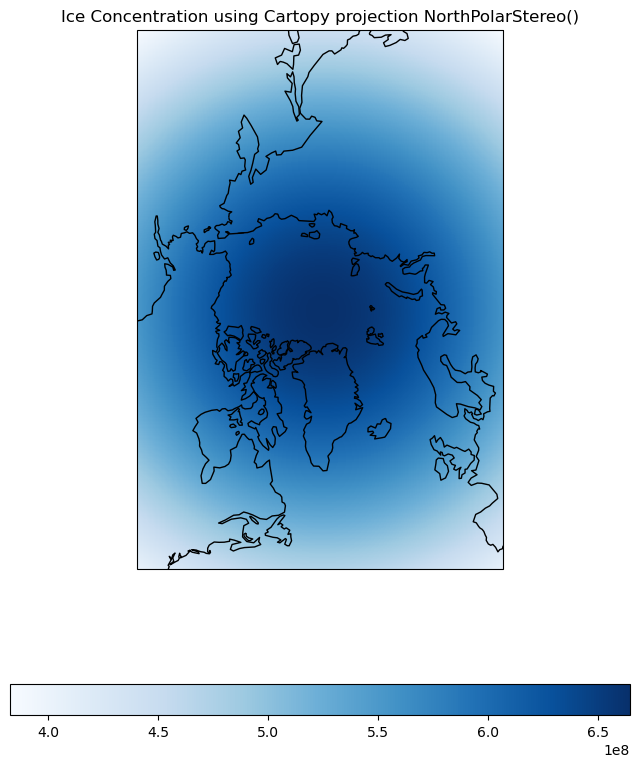

In [178]:
# set mapping crs to Cartopy's North Polar Stereo graphic
crs_epsg = ccrs.NorthPolarStereo(central_longitude=-45)

# set figure size
fig = plt.figure(figsize=[10, 10])

# set the map projection and associated boundaries
ax = plt.axes(projection = crs_epsg)
ax.coastlines()
ax.add_feature(cfeature.LAND)
print(seaice_ds['area'][0][0])
# set the data crs using 'transform' 
# set the data crs as described in the netcdf metadata
cs = ax.pcolormesh(grid_area['x'], grid_area['y'],grid_area['cell_area'] , 
                   cmap=plt.cm.Blues,  transform= ccrs.NorthPolarStereo(true_scale_latitude=70, central_longitude=-45)) #transform default is basemap specs

fig.colorbar(cs, ax=ax, location='bottom', shrink =0.8)
ax.set_title('Ice Concentration using Cartopy projection NorthPolarStereo()')

plt.show()

In [200]:
# subsetting grid area to match dataset

xgrid = ds['xgrid'].values
ygrid = ds['ygrid'].values

xmax, xmin, ymax, ymin = np.max(xgrid), np.min(xgrid), np.max(ygrid), np.min(ygrid)

sub_area = ds_area.sel(x=slice(xmin, xmax), y=slice(ymax, ymin))

## Adding area to the DataSet

In [201]:
# add grid area to the dataset
cell_area = sub_area.cell_area.values
ds['area'] = (('ygrid', 'xgrid'), cell_area)

In [202]:
ds

<xarray.Dataset>
Dimensions:                  (time: 12, ygrid: 389, xgrid: 304)
Coordinates:
  * time                     (time) datetime64[ns] 2021-01-01 ... 2021-12-01
  * ygrid                    (ygrid) float32 4.838e+06 4.812e+06 ... -4.862e+06
  * xgrid                    (xgrid) float32 -3.838e+06 -3.812e+06 ... 3.738e+06
Data variables:
    cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 ...
    area                     (ygrid, xgrid) float64 4.266e+08 ... 4.289e+08
Attributes: (12/65)
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    comment:                                             The variable melt_on...
    contributor_name:                                    Walter N. Meier, Flo...
    contributor_role:                                    principal investigat...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2021-12-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 2021-01-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

In [228]:
# subset the dataset to exclude flag values
seaice_ds = ds.where(ds.cdr_seaice_conc_monthly <= 1)

# icearea = seaice_ds.area * seaice_ds.cdr_seaice_conc_monthly[0][:]

icearea = seaice_ds.area * seaice_ds.cdr_seaice_conc_monthly
tot_icearea = np.sum(icearea)
tot_icearea

ext = seaice_ds.area * xr.where(seaice_ds.cdr_seaice_conc_monthly < 0.15, 0, 1)
extent = ext.sum(dim=['xgrid', 'ygrid']) / 1000000

icea_month = icearea.sum(dim=['xgrid', 'ygrid']) / 1000000
icea_month

<xarray.DataArray (time: 12)>
array([12573588.20885628, 13460762.97339725, 13698532.12620623,
       12824438.10910926, 11590415.95262193,  9371027.38969998,
        6722524.61938882,  4810926.44460557,  4353318.12229081,
        6304612.89786943,  9270005.76585693, 11408019.72706273])
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01

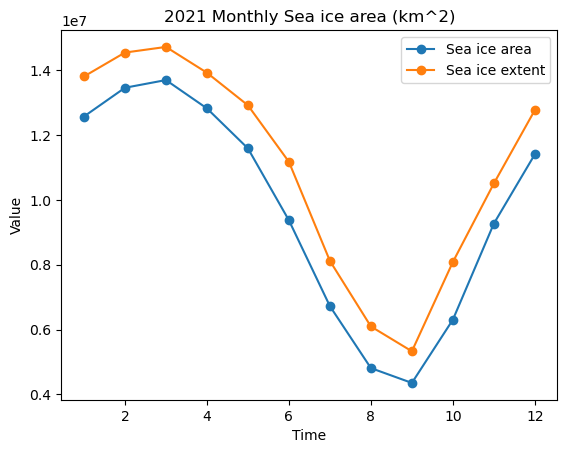

In [229]:
fig, ax = plt.subplots()

# Plot the data as a line
ax.plot(list(range(1,13)),icea_month , label='Sea ice area', marker='o', linestyle='-')
ax.plot(list(range(1,13)),extent , label='Sea ice extent', marker='o', linestyle='-')


# Add a title and labels
ax.set_title('2021 Monthly Sea ice area (km^2)')
ax.set_xlabel('Time')
ax.set_ylabel('Value')

# Display the legend
ax.legend()

# Show the plot
plt.show()